In [1]:
# import jtplot module in notebook
from jupyterthemes import jtplot
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

jtplot.style(context='notebook', fscale=1.0, spines=True, gridlines='--', ticks=True, grid=False, figsize=(10, 8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Monokai']

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dispersion import layer_dispersion
from materials.materials import Media, properties

In [4]:
import numpy as np
import matplotlib.pyplot as plt

wn = np.linspace(950, 1000, 1000)

props = properties('SiC3C')

mat1 = Media('SiC3C', props, wn)

In [10]:
def alpha(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,2,2] - kx**2)

def alpha_an1(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,1,1] - kx**2)

def alpha_an2(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,0,0] - kx**2*mat._eps[:,0,0]/mat._eps[:,2,2])

def gamma_pa(kx, wn, mat):
    return np.sqrt(mat._wlo_pa**2 - wn*(wn+1j*mat._gamma))/mat._beta_l

def beta_pa(kx, wn, mat):
    return np.sqrt(mat._wto_pa**2 - wn*(wn+1j*mat._gamma))/mat._beta_t

def gamma_pe(kx, wn, mat):
    return np.sqrt(mat._wlo_pe**2 - wn*(wn+1j*mat._gamma))/mat._beta_l

def beta_pe(kx, wn, mat):
    return np.sqrt(mat._wto_pe**2 - wn*(wn+1j*mat._gamma))/mat._beta_t

In [51]:
import seaborn as sns
kx = np.linspace(500, 740, 4)
wn = np.linspace(750, 1050, 1000)

eigs, vecs = layer_dispersion(kx, wn, 'SiC4H')

props = properties('SiC4H')

mat1 = Media('SiC4H', props, wn)

# eigs, vecs, z = layer_dispersion(kx, wn, 'SiC3C')

# props = properties('SiC3C')

# mat1 = Media('SiC3C', props, wn)

print(eigs.shape, vecs.shape)

(4, 1000, 5) (4, 1000, 10, 5)


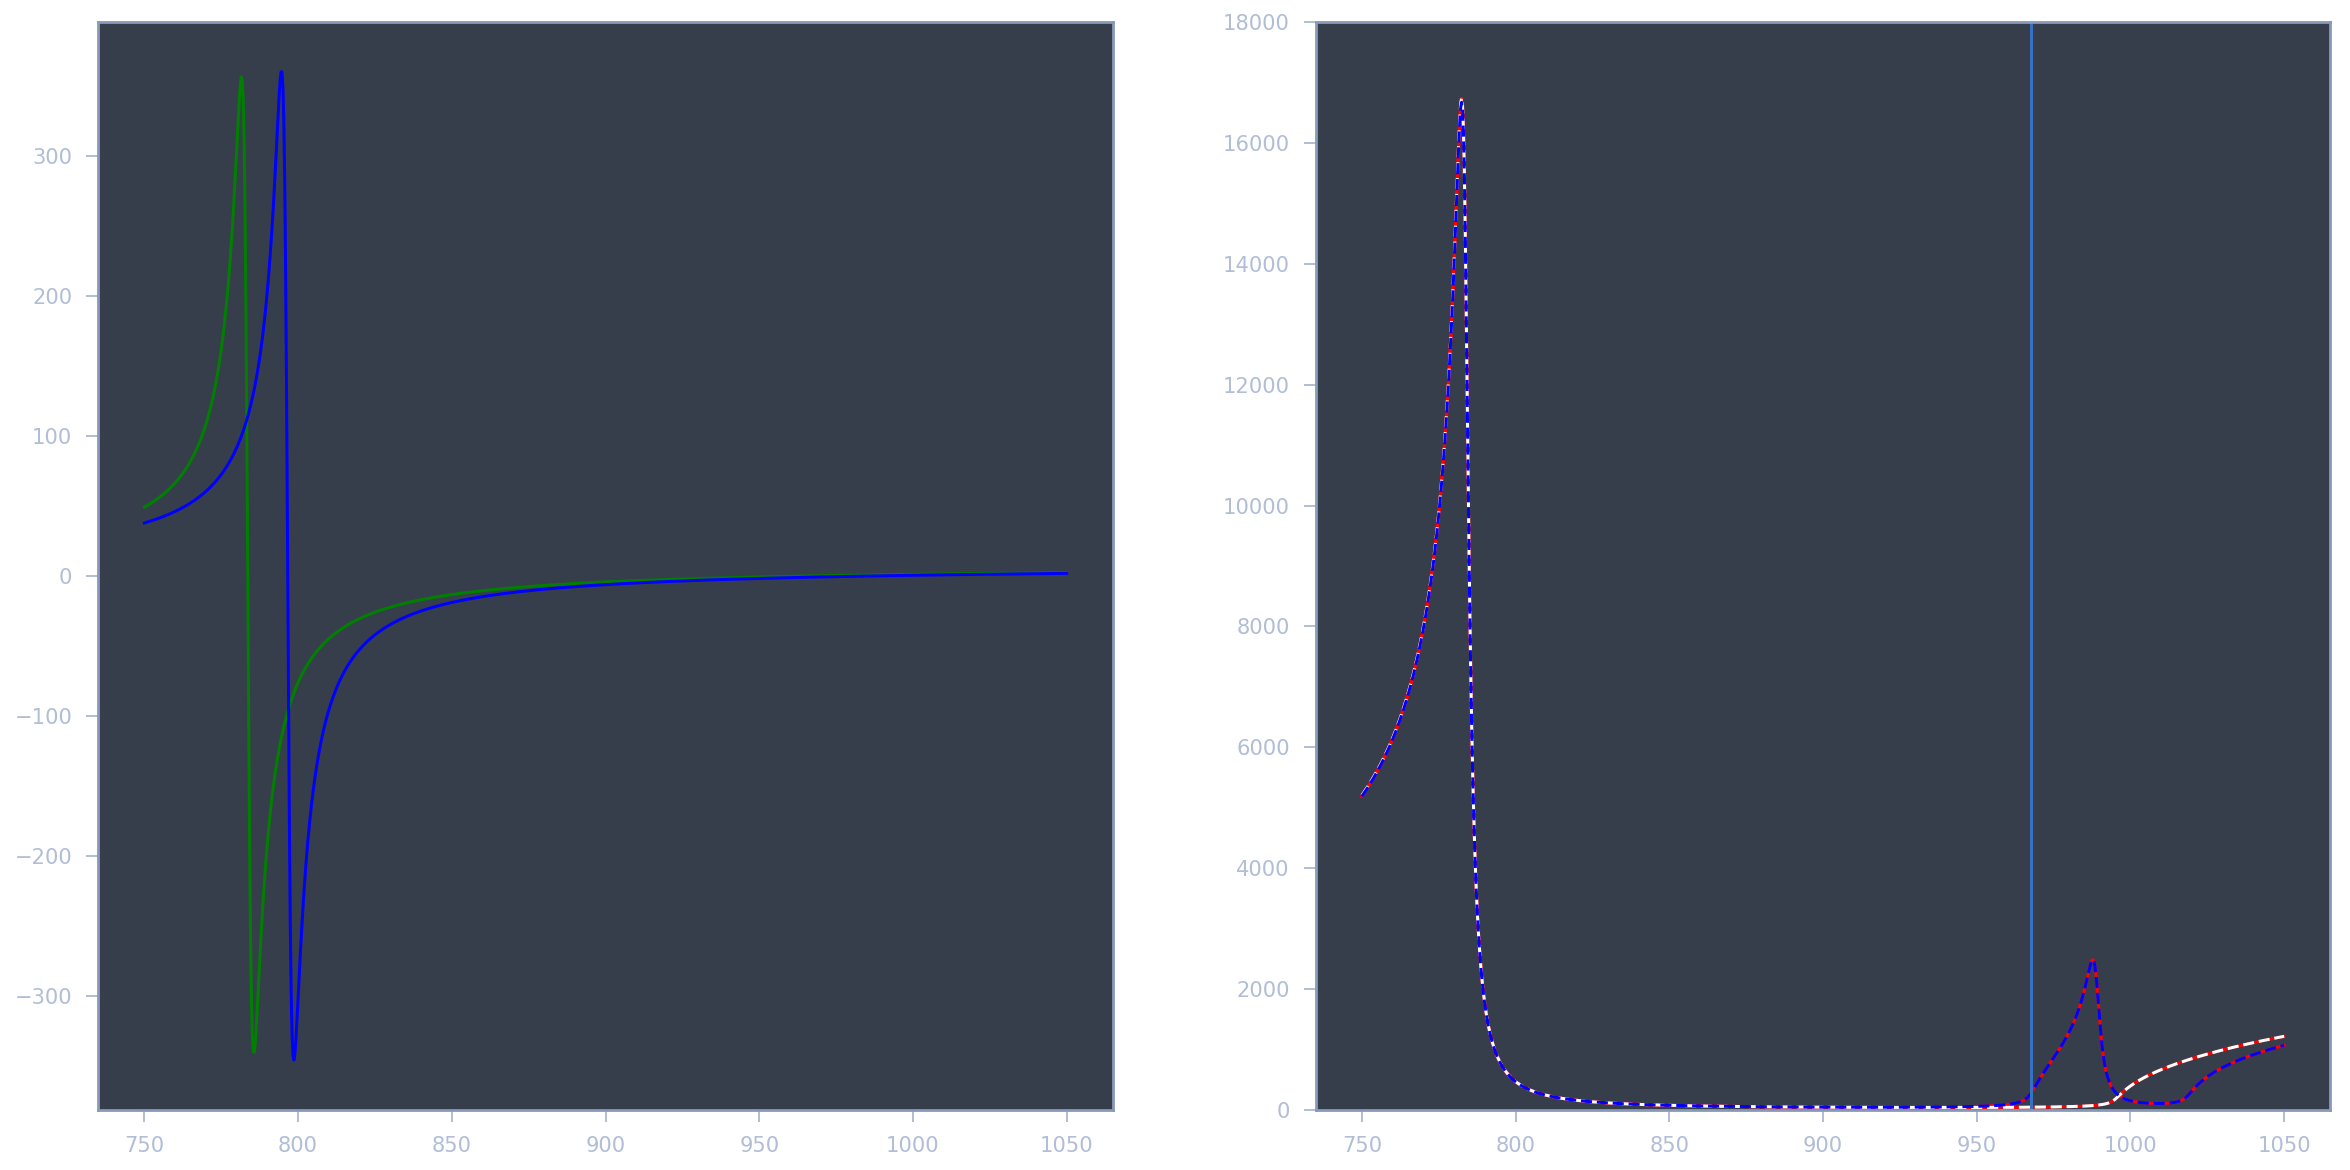

In [52]:
# a = -1
# order = eigs.argsort(axis=a)
# m, n, k = eigs.shape
# idx = np.ogrid[:m, :n, :k]
# idx[-1] = order
# eigs_r = eigs[tuple(idx)]

# m, n, k, o = vecs.shape
# idx = np.ogrid[:m, :n, :k, :o]
# order = np.repeat(order[:, :, np.newaxis, :], 10, axis=2)

# idx[-1] = order
# vecs_r = vecs[tuple(idx)]

fig, (ax1, ax2,) = plt.subplots(figsize=(20, 10), ncols=2)

cols = sns.color_palette('hls', 10)

# ax1.plot(wn, (wn*eigs_r[0,:,-1].real), color='white',linestyle='solid')
# ax1.plot(wn, (wn*eigs_r[0,:,-2].real), color='white',linestyle='solid')
# ax1.plot(wn, (wn*eigs_r[0,:,-3].real), color='white',linestyle='solid')

# ax1.plot(wn, gamma(kx[0], wn, mat1).real, color='green',linestyle='dotted')
# ax1.plot(wn, beta(kx[0], wn, mat1).real, color='green',linestyle='dotted')

ax1.plot(wn, (mat1._eps[:,0,0].real), color='green',linestyle='solid')
ax1.plot(wn, (mat1._eps[:,2,2].real), color='blue',linestyle='solid')

af = np.sin(80*np.pi/180)

# ax2.plot(wn, (wn*eigs[0,:,-5].real), color='green',linestyle='solid')
ax2.plot(wn, (wn*eigs[0,:,1].real), color='red',linestyle='solid')
ax2.plot(wn, (wn*eigs[0,:,0].real), color='red',linestyle='solid')
ax2.plot(wn, alpha_an1(af*wn, wn, mat1).real, color='white',linestyle='dashed')
ax2.plot(wn, alpha_an2(af*wn, wn, mat1).real, color='blue',linestyle='dashed')
ax2.axvline(mat1._wlo_pe)
ax2.set_ylim(0, 18000)

# ax2.plot(wn, (vecs_r[0, :, jpr, 0].real), color='red',linestyle='solid')
# ax2.plot(wn, (vecs_r[0, :, jpr, 0].imag), color='black',linestyle='solid')

# ax2.plot(wn, (vecs_r[0, :, jpr, 1].real), color='red',linestyle='dashed')
# ax2.plot(wn, (vecs_r[0, :, jpr, 1].imag), color='black',linestyle='dashed')

# ax2.plot(wn, (vecs_r[0, :, 1, 6].real), color='red',linestyle='solid')
# ax2.plot(wn, (vecs_r[0, :, 1, 6].imag), color='black',linestyle='solid')
# ax3.plot(wn, (vecs_r[0, :, 1, 5].real), color='black',linestyle='solid')
# ax2.plot(wn, (vecs_r[0, :, 0, 5].imag), color='red',linestyle='solid')
# ax3.plot(wn, (vecs_r[0, :, 1, 5].imag), color='black',linestyle='solid')

# ax2.plot(wn, (vecs_r[0, :, 0, 6].real), color='red',linestyle='dashed')
# ax3.plot(wn, (vecs_r[0, :, 1, 6].real), color='black',linestyle='dashed')
# ax2.plot(wn, (vecs_r[0, :, 0, 6].imag), color='red',linestyle='dashed')
# ax3.plot(wn, (vecs_r[0, :, 1, 6].imag), color='black',linestyle='dashed')

# ax2.set_ylim(-0.000002, 0.000002)
plt.show()

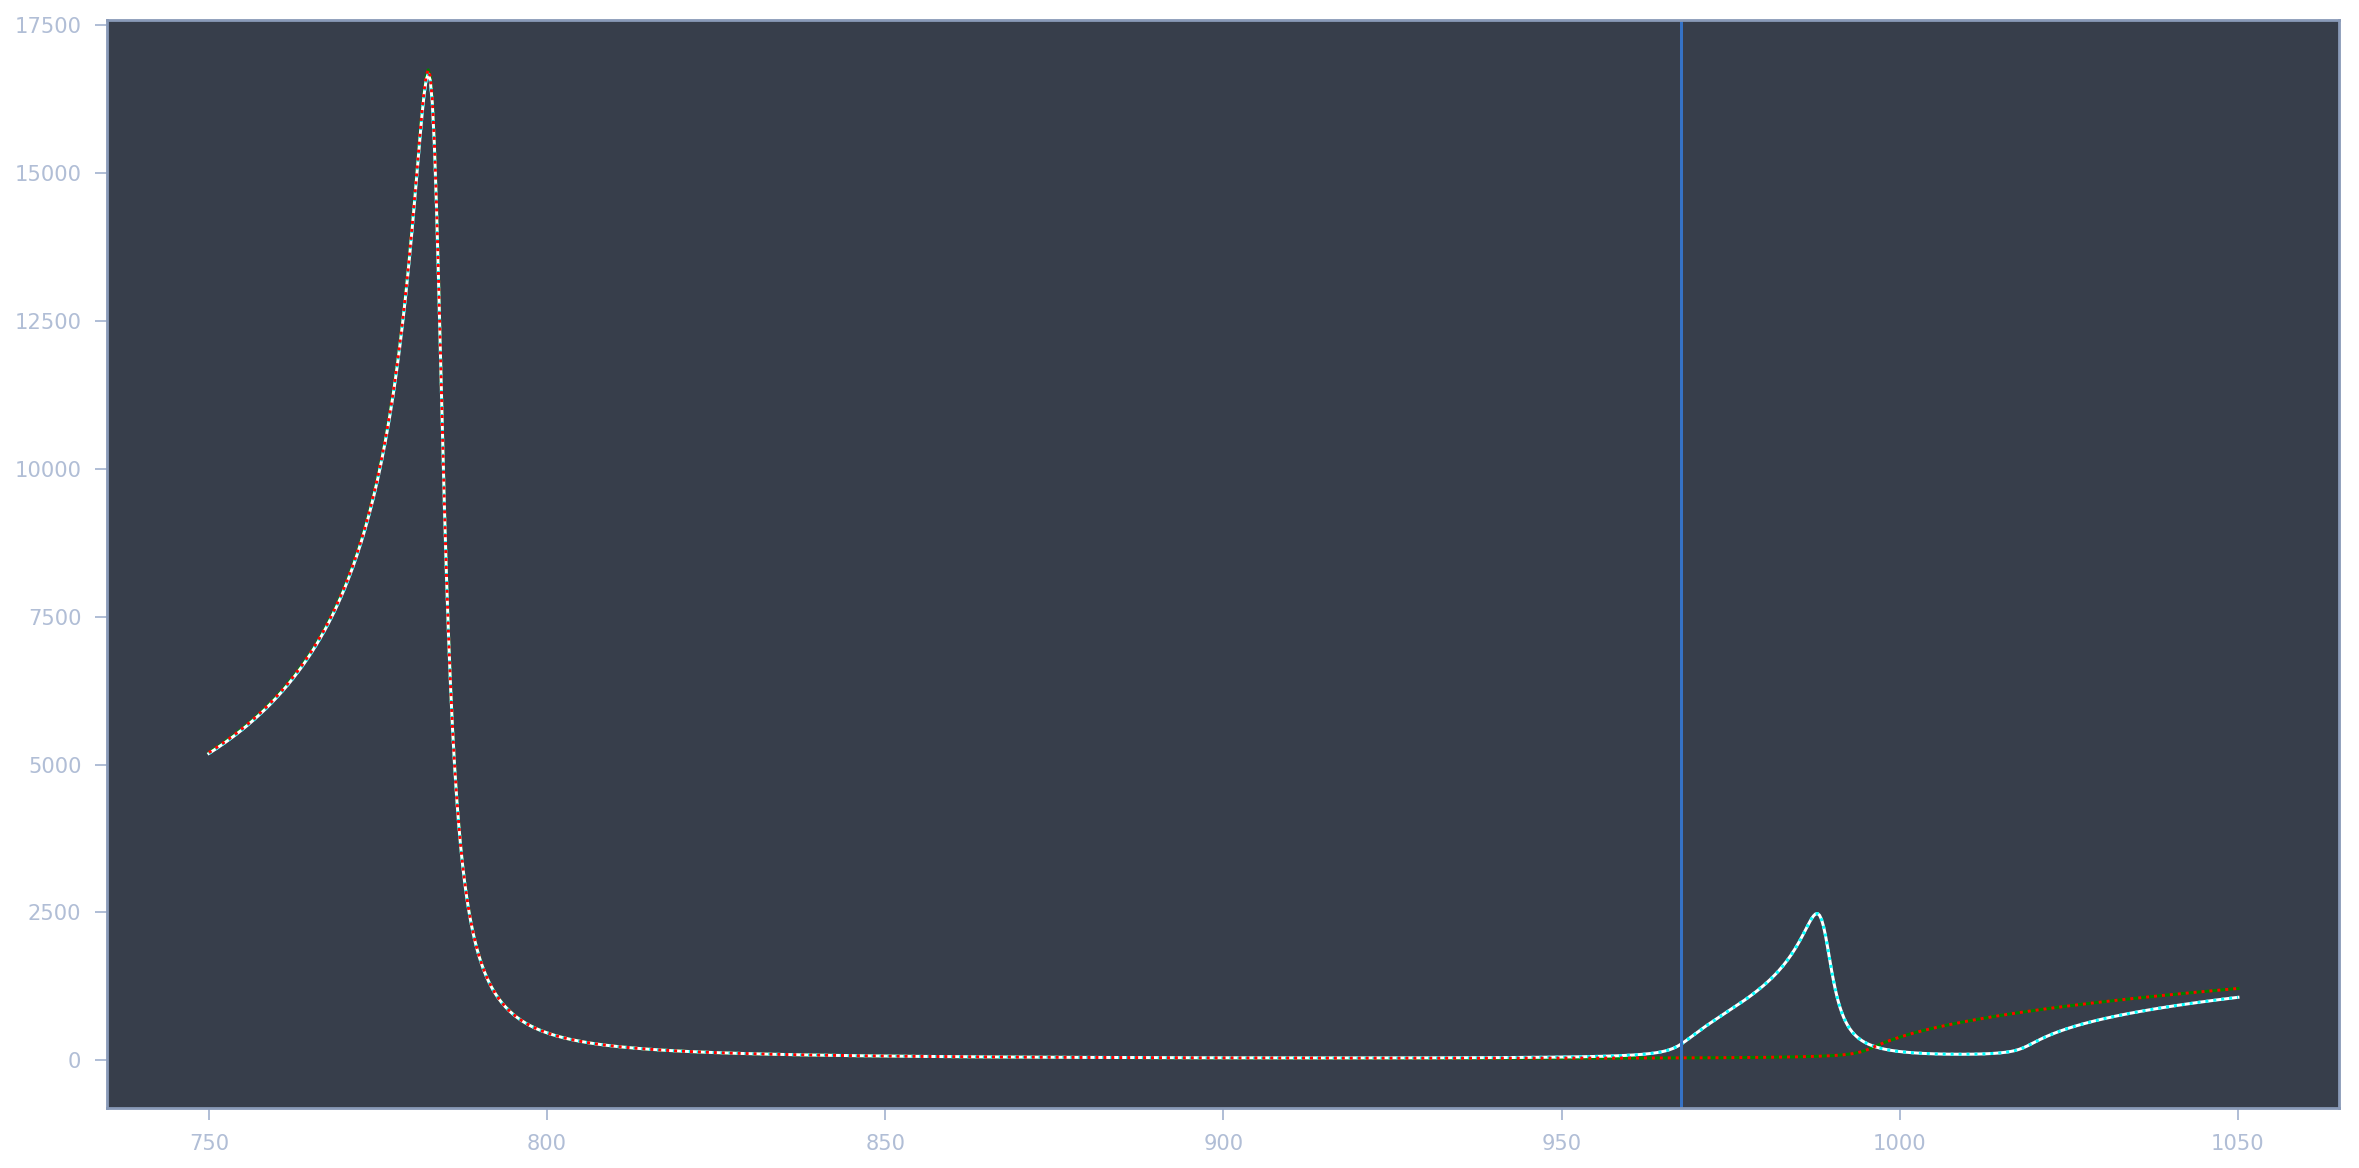

In [55]:
fig, (ax1) = plt.subplots(figsize=(20, 10))

cols = sns.color_palette('hls', 10)

# ax1.plot(wn, (wn*eigs_r[0,:,-1].real), color='white',linestyle='solid')
# ax1.plot(wn, (wn*eigs_r[0,:,-2].real), color='white',linestyle='solid')
# ax1.plot(wn, (wn*eigs_r[0,:,-3].real), color='white',linestyle='solid')


def alpha(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,0,0] - kx**2)

def alpha_an1(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,0,0] - kx**2)

def alpha_an2(kx, wn, mat):
    return np.sqrt(wn**2*mat._eps[:,0,0] - kx**2*mat._eps[:,0,0]/mat._eps[:,2,2])


ax1.plot(wn, (wn*eigs[0,:,0].real), color='green',linestyle='solid')
ax1.plot(wn, (wn*eigs[0,:,1].real), color='white',linestyle='solid')
# ax1.plot(wn, alpha_an1(kx[0], wn, mat1).real, color='blue',linestyle='dotted')
# ax1.plot(wn, alpha_an2(kx[0], wn, mat1).real, color='red',linestyle='dotted')
ax1.plot(wn, alpha_an2(af*wn, wn, mat1).real, color='cyan',linestyle='dotted')
ax1.plot(wn, alpha_an1(af*wn, wn, mat1).real, color='red',linestyle='dotted')

ax1.axvline(mat1._wlo_pe)
plt.show()

In [9]:
from dispersion import pol_comp

eig_sort, vec_sort = pol_comp(eigs_r[:,:,5:7], vecs_r[:,:,:,5:7])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)

cols = sns.color_palette('hls', 10)

ax1.plot(wn, (wn*eig_sort[0,:,1].real), color='red',linestyle='solid')
ax1.plot(wn, (wn*eig_sort[0,:,0].real), color='blue',linestyle='solid')
ax1.plot(wn, (wn*eig_sort[0,:,1].imag), color='red',linestyle='dashed')
ax1.plot(wn, (wn*eig_sort[0,:,0].imag), color='blue',linestyle='dashed')
# ax1.set_yscale('log')


# ax2.plot(wn, (
#         np.abs(vec_sort[0, :, 0,0])**2
#         / (np.abs(vec_sort[0, :, 0,0])**2+np.abs(vec_sort[0, :, 1,0])**2)
#         ), color='red',linestyle='dashed')
# ax2.plot(wn, (
#         np.abs(vec_sort[0, :, 0,1])**2
#         / (np.abs(vec_sort[0, :, 0,1])**2+np.abs(vec_sort[0, :, 1,1])**2)
#         ), color='black',linestyle='dashed') 

# ax2.plot(wn, (np.abs(vec_sort[0, :, 0,0])), color='red',linestyle='dashed')
ax2.plot(wn, (np.abs(vec_sort[0, :, 0,1])), color='black',linestyle='dashed') 
ax2.plot(wn, (np.abs(vec_sort[0, :, 1,0])), color='black',linestyle='dashed') 

ax2.set_yscale('log')
plt.show()

eig_sort, vec_sort = pol_comp(eigs_r[:,:,7:9], vecs_r[:,:,:,7:9])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True)

cols = sns.color_palette('hls', 10)

ax1.plot(wn, (wn*eig_sort[0,:,1].real), color='red',linestyle='solid')
ax1.plot(wn, (wn*eig_sort[0,:,0].real), color='blue',linestyle='solid')
ax1.plot(wn, (wn*eig_sort[0,:,1].imag), color='red',linestyle='dashed')
ax1.plot(wn, (wn*eig_sort[0,:,0].imag), color='blue',linestyle='dashed')
# ax1.set_yscale('log')


# ax2.plot(wn, (
#         np.abs(vec_sort[0, :, 0,0])**2
#         / (np.abs(vec_sort[0, :, 0,0])**2+np.abs(vec_sort[0, :, 1,0])**2)
#         ), color='red',linestyle='dashed')
# ax2.plot(wn, (
#         np.abs(vec_sort[0, :, 0,1])**2
#         / (np.abs(vec_sort[0, :, 0,1])**2+np.abs(vec_sort[0, :, 1,1])**2)
#         ), color='black',linestyle='dashed') 

# ax2.plot(wn, (np.abs(vec_sort[0, :, 0,0])), color='red',linestyle='dashed')
ax2.plot(wn, (np.abs(vec_sort[0, :, 0,1])), color='black',linestyle='dashed') 
ax2.plot(wn, (np.abs(vec_sort[0, :, 1,0])), color='black',linestyle='dashed') 

ax2.set_yscale('log')
plt.show()

NameError: name 'eigs_r' is not defined

/Users/christophergubbin/anaconda/envs/qutenv35/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


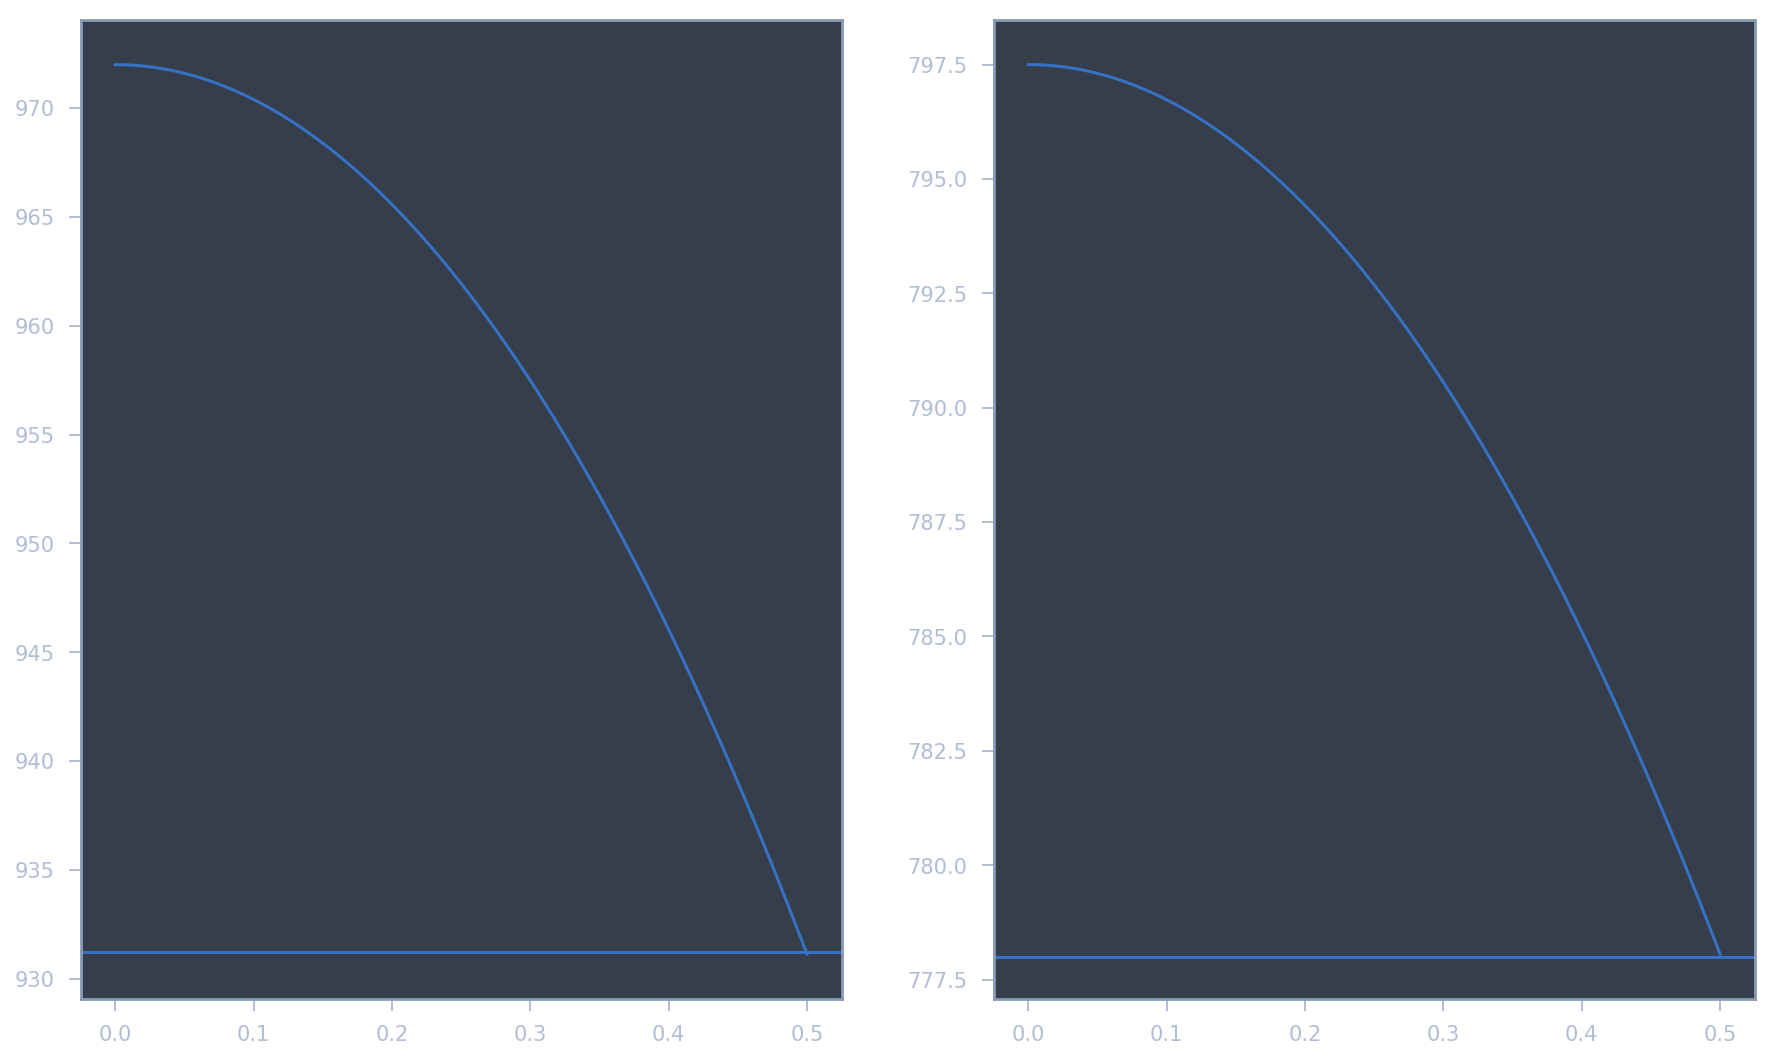

In [8]:
beta_l = mat1._beta_l
beta_t = mat1._beta_t

kx_max =(0.01/2/np.pi)*np.pi/4.3596e-10

kx_l = np.linspace(100, kx_max/2, 200)

st = 4.575
sl = 1.62
wlo = 972
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 9))
ax1.plot(kx_l/kx_max, np.sqrt(wlo**2 - kx_l**2*(sl*beta_l)**2+1j))
ax1.axhline(wlo-40.75)
ax2.plot(kx_l/kx_max, np.sqrt(797.5**2 - kx_l**2*(st*beta_t)**2+1j))
ax2.axhline(778)
# ax.plot(kx_l, np.sqrt(kx_l**2*beta_l**2+1j))
plt.savefig('test2.eps')
plt.show()

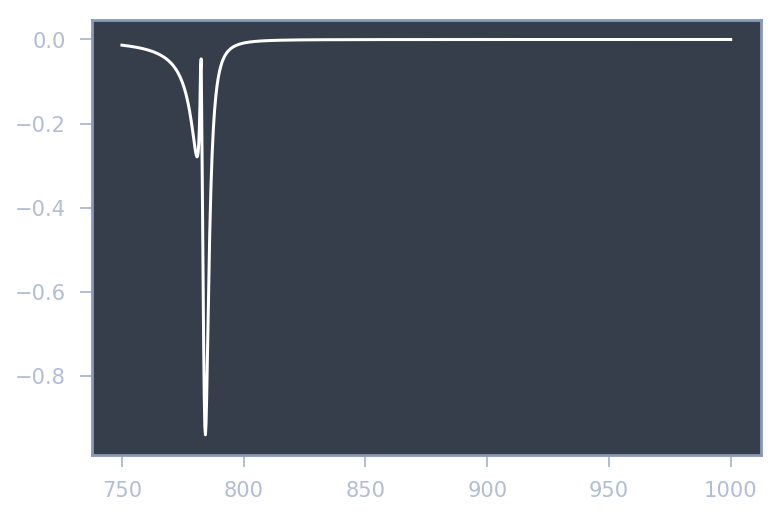

In [252]:
plt.plot(wn, (wn*eigs_r[-1,:,-3].real-wn*eigs_r[-1,:,-2].real), color='white',linestyle='solid')
